In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [69]:
df = pd.read_excel("purchases.xlsx")

In [70]:
df.columns = ['Customer_ID', 'Purchase_Amount', 'Date_of_Purchase' ]

In [71]:
df.head()

,Customer_ID,Purchase_Amount,Date_of_Purchase
0,760,25.0,2009-06-11 00:00:00
1,860,50.0,09/28/12
2,1200,100.0,10/25/05
3,1420,50.0,2009-09-07 00:00:00
4,1940,70.0,01/25/13


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       51243 non-null  int64  
 1   Purchase_Amount   51243 non-null  float64
 2   Date_of_Purchase  51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [73]:
df['Date_of_Purchase'] = pd.to_datetime(df['Date_of_Purchase'])
df['Date_of_Purchase'].dtype

dtype('<M8[ns]')

In [74]:
df['Customer_ID'].nunique()

18417

In [75]:
df.head()

,Customer_ID,Purchase_Amount,Date_of_Purchase
0,760,25.0,2009-06-11
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-09-07
4,1940,70.0,2013-01-25


In [76]:
df['Year_of_Purchase'] =pd.DatetimeIndex(df['Date_of_Purchase']).year


In [77]:
df.head()

,Customer_ID,Purchase_Amount,Date_of_Purchase,Year_of_Purchase
0,760,25.0,2009-06-11,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-09-07,2009
4,1940,70.0,2013-01-25,2013


In [78]:
df.describe()

,Customer_ID,Purchase_Amount,Year_of_Purchase
count,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,2010.869699
std,67650.610139,156.606801,2.883072
min,10.000000,5.000000,2005.000000
25%,57720.000000,25.000000,2009.000000
50%,102440.000000,30.000000,2011.000000
75%,160525.000000,60.000000,2013.000000
max,264200.000000,4500.000000,2015.000000


[Text(0, 0.5, 'No of Bill'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Year wise Frequency distribution of bill')]

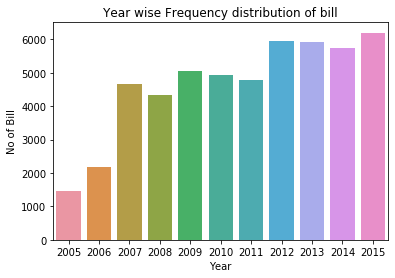

In [79]:
#No of bills generated is almost stable in the last 4 years

ax = sns.countplot(x='Year_of_Purchase',data=df)
ax.set(xlabel = 'Year', ylabel = 'No of Bill', title = 'Year wise Frequency distribution of bill')

In [80]:
#df['Year_of_Purchase'].value_counts().plot(kind='bar')

In [81]:
df['Year_of_Purchase'].nunique()

11

[Text(0, 0.5, 'Average Bill Valu'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Year on Year Average Bill Value')]

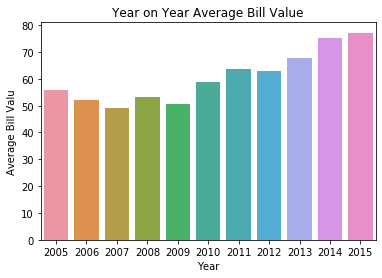

In [82]:
# Average Bill value is increasing in the last 4 years

df_2 = df.groupby('Year_of_Purchase')['Purchase_Amount'].mean()
df_2.columns=['Purchase_Amount']
df_2 =df_2.reset_index()

ax = sns.barplot(x='Year_of_Purchase',y='Purchase_Amount' ,data=df_2)
ax.set(xlabel = 'Year', ylabel = 'Average Bill Valu', title = 'Year on Year Average Bill Value')

[Text(0, 0.5, 'Total Bill Value'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Year on Year Total Bill Value')]

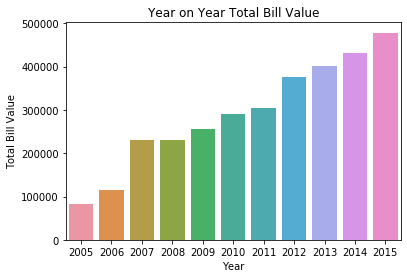

In [83]:
# Total Bill value is increasing in the last 4 years
df_2 = df.groupby('Year_of_Purchase')['Purchase_Amount'].sum()
df_2.columns=['Purchase_Amount']
df_2 =df_2.reset_index()

ax = sns.barplot(x='Year_of_Purchase',y='Purchase_Amount' ,data=df_2)
ax.set(xlabel = 'Year', ylabel = 'Total Bill Value', title = 'Year on Year Total Bill Value')

In [84]:
df.columns

Index(['Customer_ID', 'Purchase_Amount', 'Date_of_Purchase',
       'Year_of_Purchase'],
      dtype='object')

In [85]:
df['D'] = '2016-01-01'
df['D'] = pd.to_datetime(df['D'])
df['days_since'] = df['D'] -df['Date_of_Purchase']
df['days_since'] = df['days_since'].dt.days
df['days_since'].head()


0    2395
1    1190
2    3720
3    2307
4    1071
Name: days_since, dtype: int64

In [86]:
df['days_since'].dtypes

dtype('int64')

In [87]:

df_new= df.groupby('Customer_ID')['Purchase_Amount'].count()
df_new = df_new.reset_index()
df_new.columns = ['Customer_ID', 'Frequency']

In [88]:
df_1 = df.groupby('Customer_ID')['Purchase_Amount'].mean()
df_1 = df_1.reset_index()
df_new['Monetary_Value'] = df_1['Purchase_Amount']
df_new

,Customer_ID,Frequency,Monetary_Value
0,10,1,30.000000
1,80,7,71.428571
2,90,10,115.800000
3,120,1,20.000000
4,130,2,50.000000
...,...,...,...
18412,263820,1,10.000000
18413,263870,1,50.000000
18414,263880,1,20.000000
18415,263890,1,54.000000


In [89]:
df_2 = df.groupby('Customer_ID')['days_since'].min()
df_2 = df_2.reset_index()
df_new['Recency'] = df_2['days_since']
df_new.set_index('Customer_ID')
df_new.head()

,Customer_ID,Frequency,Monetary_Value,Recency
0,10,1,30.000000,3799
1,80,7,71.428571,343
2,90,10,115.800000,994
3,120,1,20.000000,1459
4,130,2,50.000000,2970


In [90]:
df_new.describe()

,Customer_ID,Frequency,Monetary_Value,Recency
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,2.782375,57.792985,1266.472715
std,69504.599881,2.936888,154.360109,1076.093067
min,10.000000,1.000000,5.000000,1.000000
25%,81990.000000,1.000000,21.666667,281.000000
50%,136430.000000,2.000000,30.000000,1071.000000
75%,195100.000000,3.000000,50.000000,2131.000000
max,264200.000000,45.000000,4500.000000,4009.000000


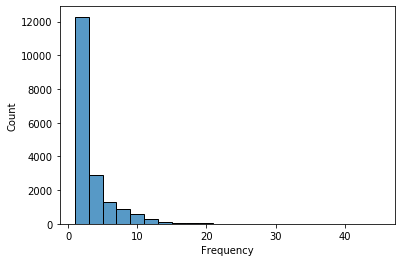

In [91]:
sns.histplot(data = df_new, x= 'Frequency', binwidth=2)
plt.show()

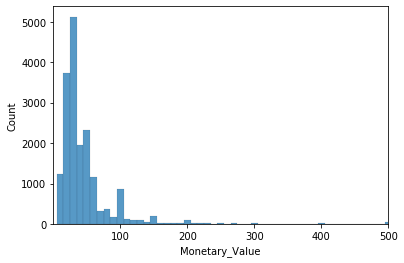

In [92]:
ax =sns.histplot(data = df_new, x= 'Monetary_Value', binwidth=10)
ax.set_xlim(0,500)
ax.set_xticks([100,200,300,400, 500])
plt.show()

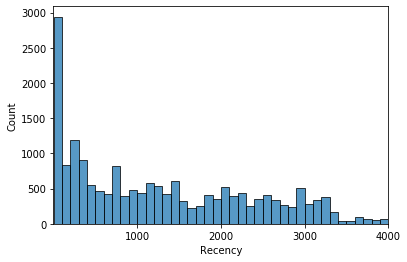

In [93]:
ax =sns.histplot(data = df_new, x= 'Recency', binwidth=100)
ax.set_xlim(0,4000)
ax.set_xticks([1000,2000,3000,4000])
plt.show()


In [94]:
df_new['Frequency'] = np.log(df_new['Frequency'] )

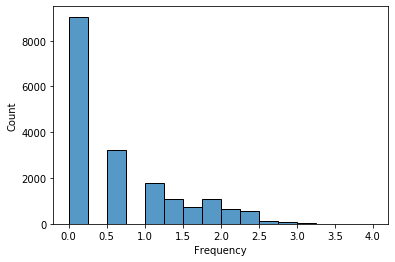

In [100]:
sns.histplot(data = df_new, x= 'Frequency', binwidth=.25)
plt.show()